<Figure size 720x576 with 0 Axes>

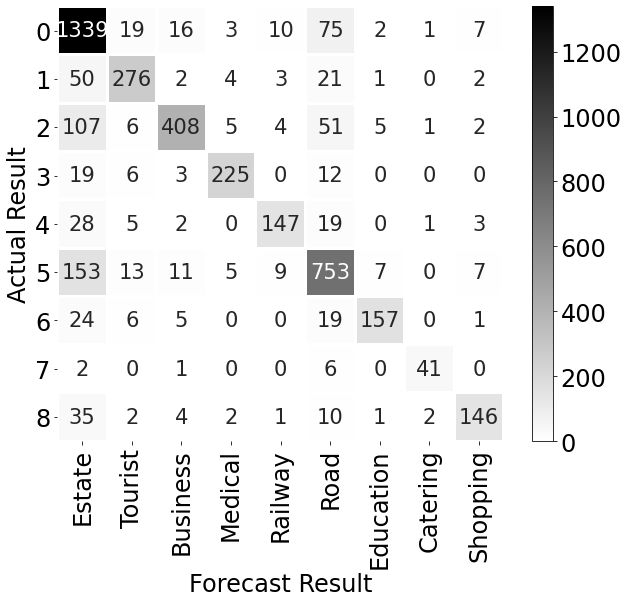

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#绘制混淆矩阵
conmatrix=np.array([[1339,19,16,3,10,75,2,1,7],
 [50,276,2,4,3,21,1,0,2],
 [107,6,408,5,4,51,5,1,2],
 [19,6,3,225,0,12,0,0,0],
 [28,5,2,0,147,19,0,1,3],
 [153,13,11,5,9,753,7,0,7],
 [24,6,5,0,0,19,157,0,1],
 [2,0,1,0,0,6,0,41,0],
 [35,2,4,2,1,10,1,2,146]])
df_cm=pd.DataFrame(conmatrix,
                  columns=['Estate','Tourist','Business','Medical','Railway','Road','Education','Catering','Shopping'])#&Transport
 
plt.figure(figsize=(10,8))
f, ax= plt.subplots(figsize = (10, 8))
 
h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
            annot_kws={'size':21},cbar=False)
 
#h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
cb=h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
 
ax.tick_params(labelsize=24)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
plt.ylabel('Actual Result',fontsize=24)
plt.xlabel('Forecast Result',fontsize=24)
plt.savefig('cnn.svg',format='svg')
plt.show()

In [7]:
def kappa(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

In [8]:
kappa(conmatrix)

0.7563168172545249

In [9]:
conmatrix.sum()

4313